## Introduction

This notebook demonstrates the process of solving a linear regression problem using various methods. The code is designed to work with datasets comprised of numerical data, assuming that the target variable is in the first column of the data table.

Here's a quick rundown of the notebook's contents:

- **Data Loading**: We will be loading data from a CSV file. Please make sure to specify the correct path to the .csv file in the code cell provided.

- **Data Splitting**: We will split the data into independent and dependent variables, followed by further subsets for training, cross-validation, and testing.

- **Feature Importance Calculation**: We calculate and filter features based on the Gini coefficient.

- **Feature Visualization**: We view correlations between features through a heat map.

- **Model Training**: We train various models, including Artificial Neural Networks, Ordinary Least Squares, and our custom linear regression model.

- **Model Evaluation**: Each model's performance is evaluated using the Mean Squared Error (MSE), and the results of each are compared in a final plot.

Remember to ensure that the `utils.py` file, which houses necessary functions, is in the same directory as this notebook for successful execution.


In [16]:
# Import libraries (utils.py should be in the same folder as the notebook)
from utils import *

In [17]:
# Load data with your path to the table
# Test 1: Bucharest weather data from 2000 until 2003
df = pd.read_csv('Test_1_weather_data_bucharest_2000_2023.csv', encoding = "ISO-8859-1")
# Test 2: Spotify data of 32,833 songs
df = pd.read_csv('Test_2_spotify_data.csv')

In [18]:
# Split data into independent and dependent variables. The first column should be the dependent variable y.
y = df.iloc[:, 0] # The Y-axis variable
x = df.iloc[:, 1:] #.drop(columns='temp', axis=1)

In [19]:
# Split the data into 3 samples: train, cross validation (cv) and test
x_train, x_, y_train, y_ = train_test_split(x, y, train_size=.6, shuffle=False) # Split into train and the rest
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=.5, shuffle=False) # Split the rest into cv and test

The selected best min splits is 30, best max depth is 16 and the best n estimators is 50.


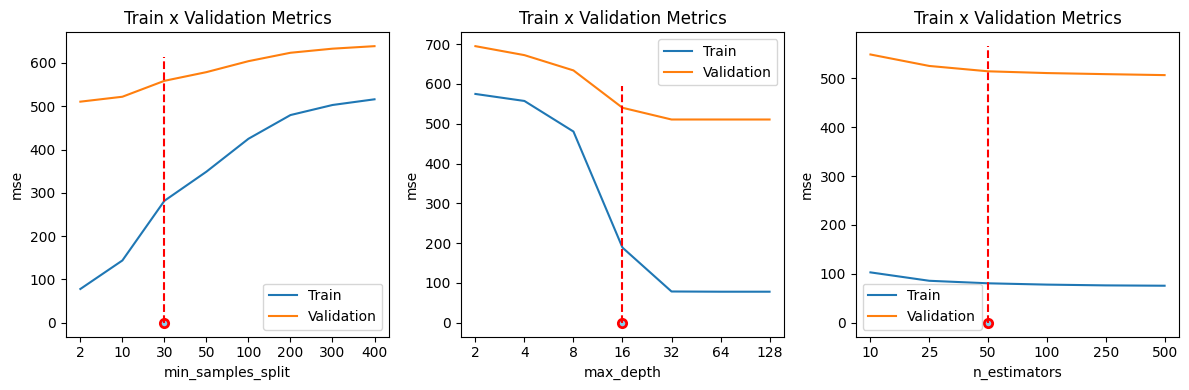

In [20]:
# Run multiple Random Forest (RF) models to find best RF parameters
best_min_split, best_max_depth, best_n_estimators = BestParam.best_forest_regressor(x_train, y_train, x_cv, y_cv)

,feature,gini
0,loudness,0.120448
1,duration_ms,0.108534
2,energy,0.107236
3,speechiness,0.100147
4,danceability,0.099026
5,tempo,0.093921
6,valence,0.089114
7,liveness,0.086916
8,acousticness,0.080934
9,instrumentalness,0.077926


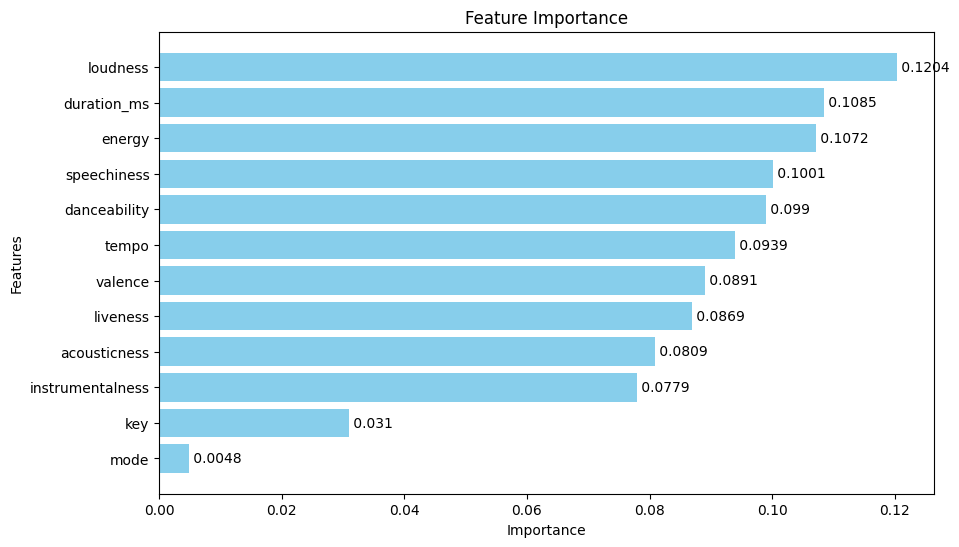

In [21]:
# Calculating the Gini coefficient for the variables and select the ones above 0.The parameters values are based on the previous step. Feel free to change if relevant
all_feature_importance = feature_importance(x_train, y_train, best_min_split, best_max_depth, best_n_estimators) 
# View the list of variables with gini importance above 0 and plotted on a bar graph
all_feature_importance

In [22]:
# Filter the samples to only include the selected features
x_train_all = x_train[list(all_feature_importance.iloc[:, 0])]
x_cv_all = x_cv[list(all_feature_importance.iloc[:, 0])]

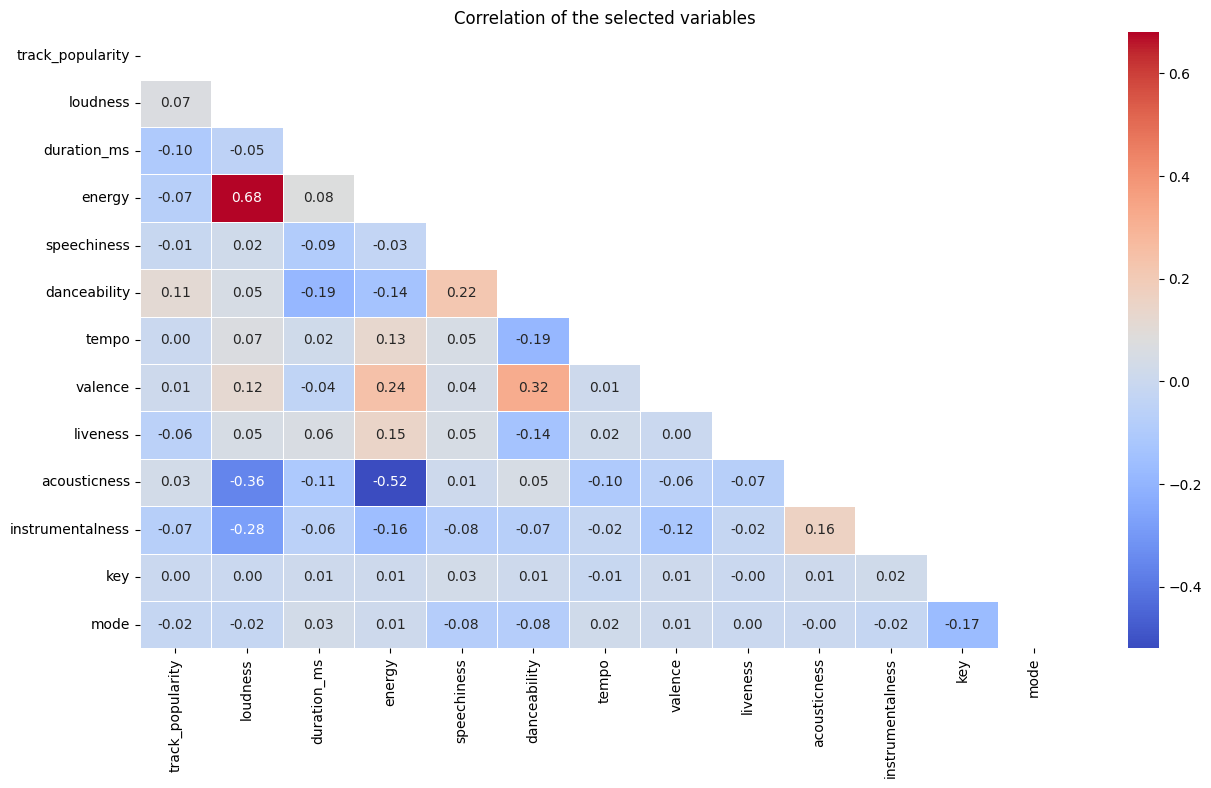

In [23]:
# Visualize the feature correlations via a heat map
plot_correlation_heatmap(x_train_all, y_train)

Running for Polynomial degree = 1
Added column duration_ms with the MSE: 698.514112
Added column loudness with the MSE: 687.325723
Added column energy with the MSE: 656.100067

Selected features: ['duration_ms', 'loudness', 'energy'] 

Running for Polynomial degree = 2
Added column duration_ms with the MSE: 698.678430
Added column loudness with the MSE: 686.851677
Added column energy with the MSE: 653.151824

Selected features: ['duration_ms', 'loudness', 'energy'] 

Running for Polynomial degree = 3
Added column duration_ms with the MSE: 692.198223
Added column loudness with the MSE: 683.388869
Added column energy with the MSE: 649.109882

Selected features: ['duration_ms', 'loudness', 'energy'] 

Running for Polynomial degree = 4
Added column duration_ms with the MSE: 691.004458
Added column loudness with the MSE: 681.104416
Added column energy with the MSE: 645.941667

Selected features: ['duration_ms', 'loudness', 'energy'] 


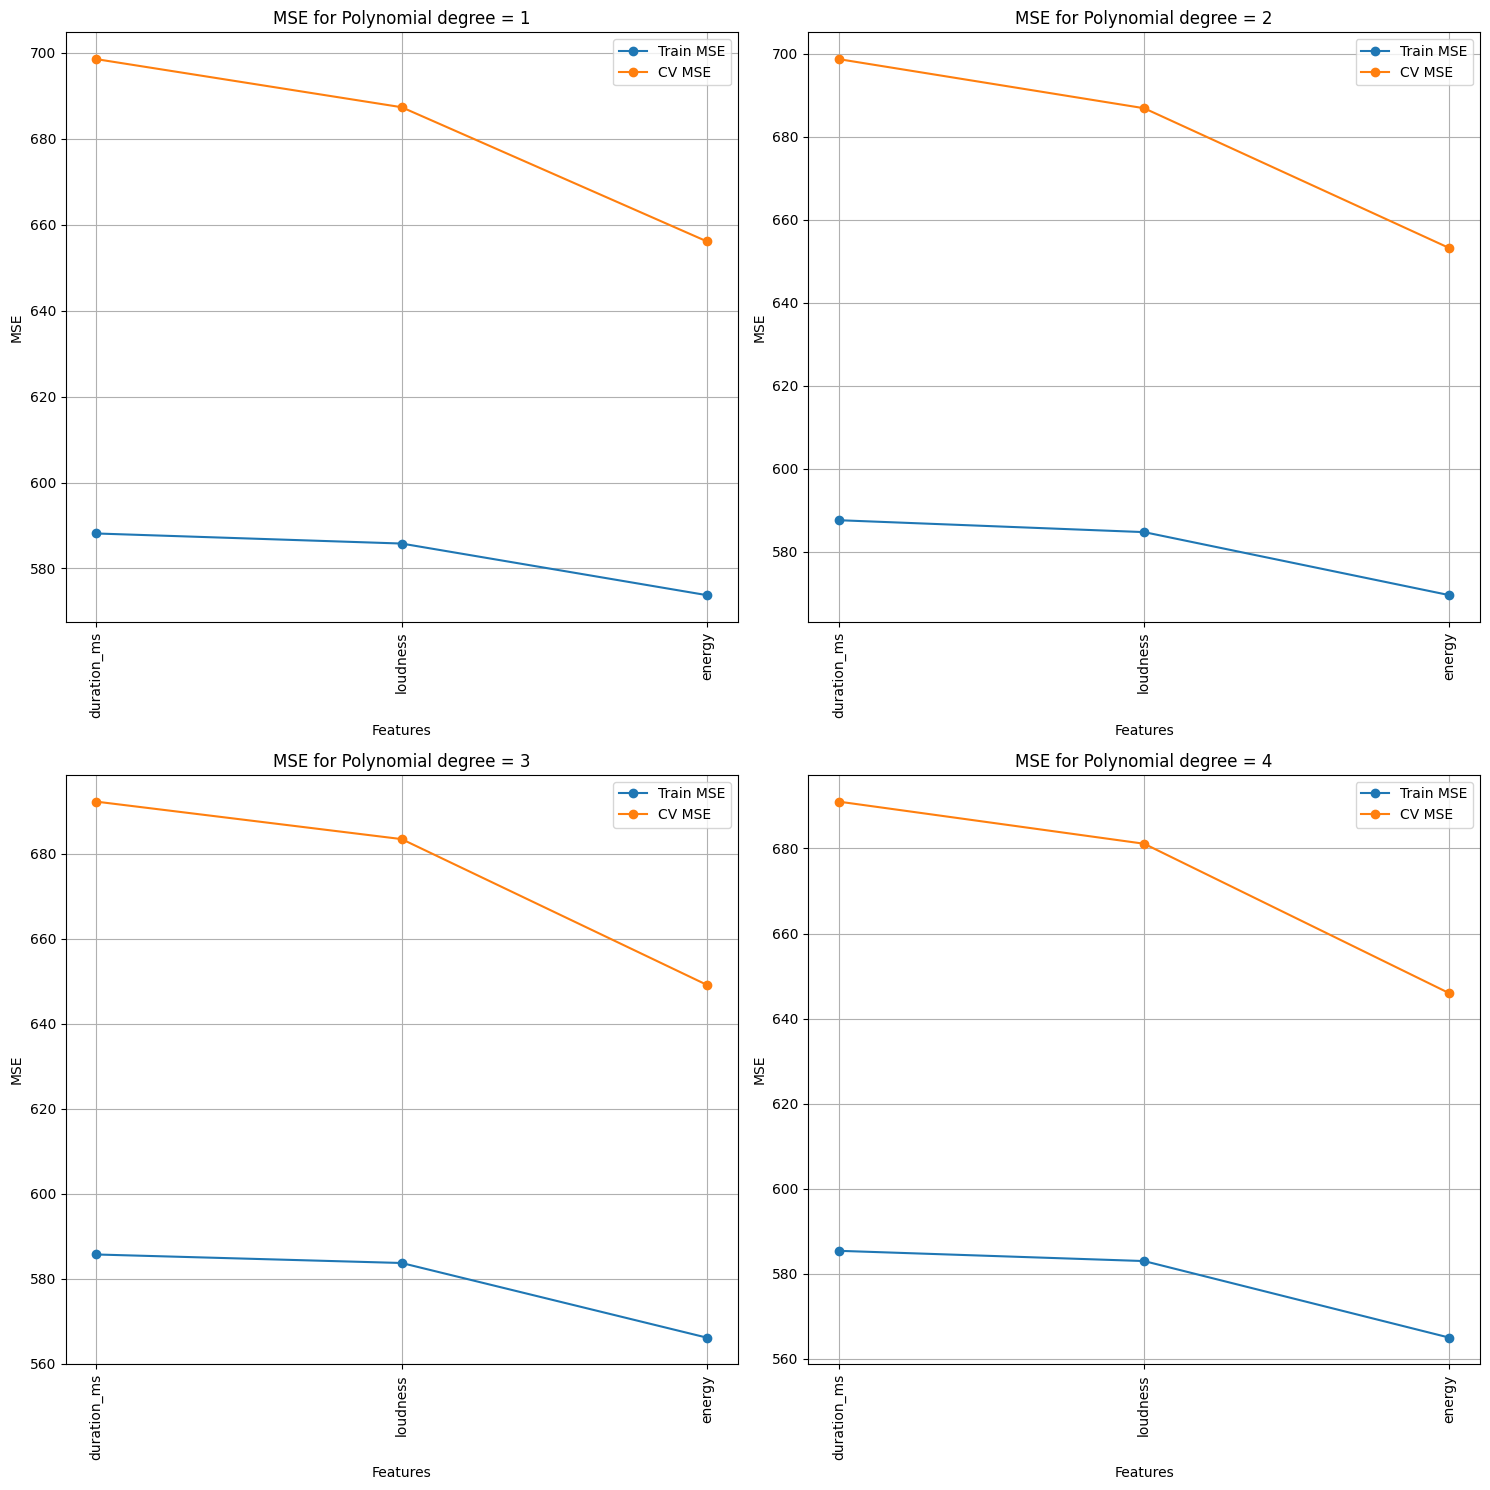

Features selected at least twice ['duration_ms', 'loudness', 'energy']


In [24]:
# Compute the MSE using OLS linear regression model by adding each feature to a new model. Iterate this throughout 4 degrees of polynomial.
selected_features, all_feature_importance = linear_regression_feature_performance(x_train_all, y_train, x_cv_all, y_cv, all_feature_importance, max_poly_degree=4, reduce_corr=False, corr_limit=0.8)

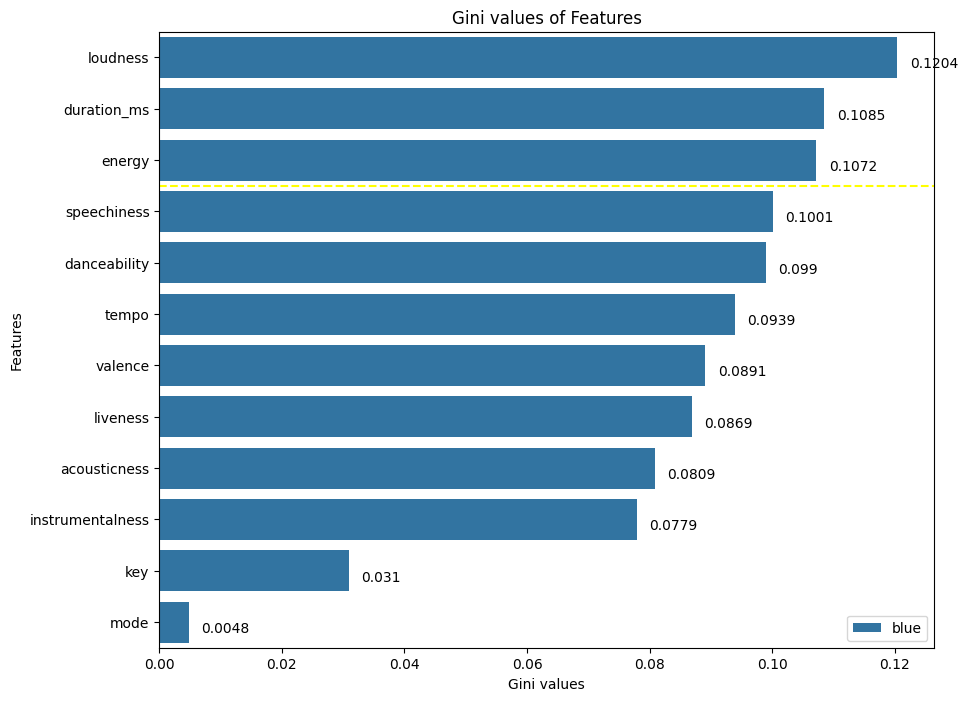

In [25]:
# Plot the gini value with the selected features
plot_selected_features(selected_features, all_feature_importance)

In [26]:
# Filter the samples to only include the selected features
x_train_rdy = x_train[list(selected_features.iloc[:, 0])]
x_cv_rdy = x_cv[list(selected_features.iloc[:, 0])]
x_test_rdy = x_test[list(selected_features.iloc[:, 0])]

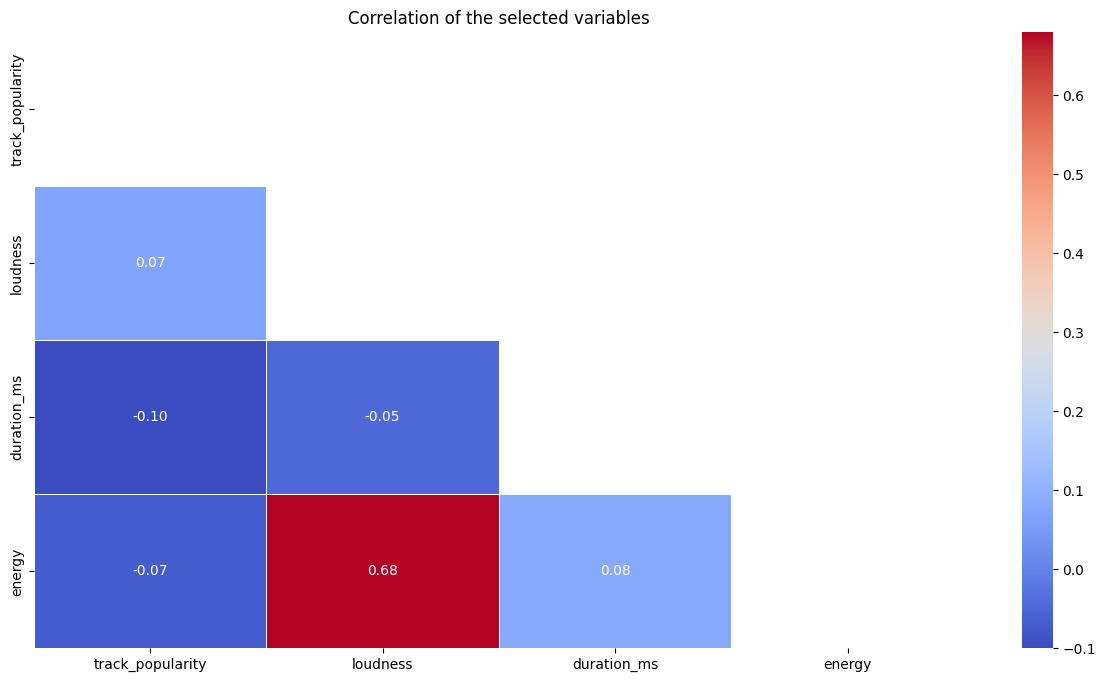

In [27]:
# Visualize the feature correlations via a heat map
plot_correlation_heatmap(x_train_rdy, y_train)

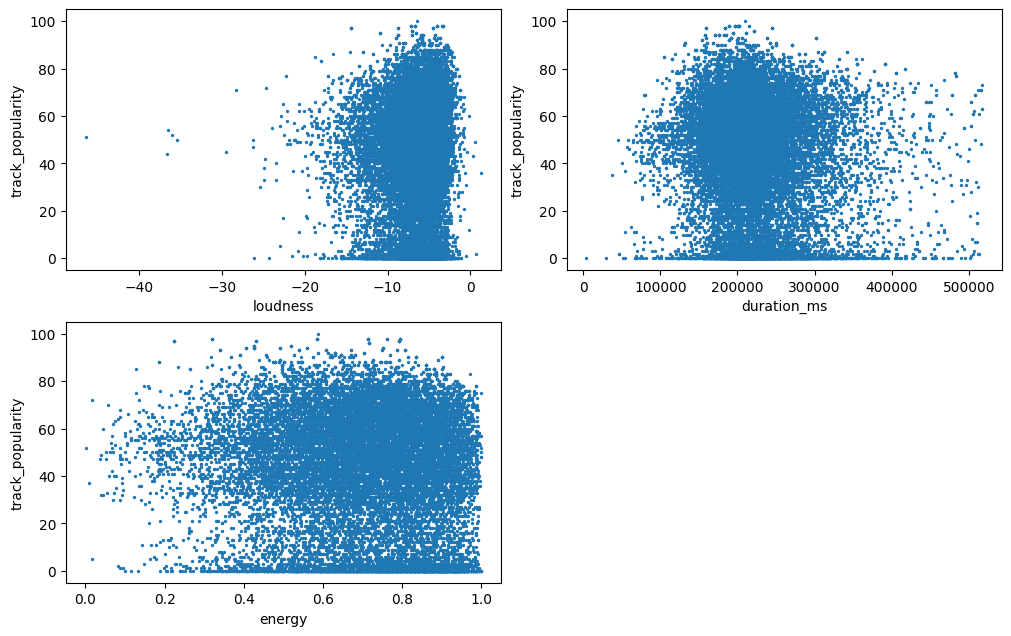

In [28]:
# Plot the selected features of the train sample
plot_features(x_train_rdy,y_train)

In [29]:
# Dictionaries to store models information
all_models = {}
all_mse = {}
all_standardscaler = {}
all_polyft = {}

In [ ]:
# Run a Neural Network with 3 LeakyReLU input layers with 24/16/8 units and alpha of 0.2 and a linear output layer using tensorflow.keras library
all_models['Neural_Network'], all_standardscaler['Neural_Network'], all_polyft['Neural_Network'], pred_test_nn, all_mse['Neural_Network'] = linear_neural_regression(x_train_rdy, y_train, x_cv_rdy, y_cv, x_test_rdy, y_test, max_degree=4, learning_rate=0.001, epochs=500,verbose=0)

206/206 [==============================] - 0s 319us/step
Development of the model with polynomial degree of 1
The MSE for the train set is 562.708309 and the Cross Validation is: 646.972246


In [ ]:
# Run a linear regression algorithm based on OLS (normal equation) using sci-kit learn library
all_models['OLS'], all_standardscaler['OLS'], all_polyft['OLS'], pred_test_ols, all_mse['OLS'] = linear_regression_ols(x_train_rdy, y_train, x_cv_rdy, y_cv, x_test_rdy, y_test)

In [ ]:
# Assign values for the gradient_descent function parameters
iterations = 10000
alpha = 5.0e-3
all_models['Gradient Decent'] = {}
# Run a manual linear regression algorithm with a gradient descent method
all_models['Gradient Decent']['w'], all_models['Gradient Decent']['b'],  all_standardscaler['Gradient Decent'], all_polyft['Gradient Decent'], pred_test_gd, all_mse['Gradient Decent'] = linear_regression_gradient_descent(x_train_rdy,
                                                                        y_train,
                                                                        x_cv_rdy,
                                                                        y_cv,
                                                                        x_test_rdy,
                                                                        y_test,
                                                                        alpha,
                                                                        iterations,
                                                                        last_errors=10,
                                                                        cost_decimals=4)

In [ ]:
# Labels for the model names
model_labels = ['Neural Network', 'OLS', 'Gradient Descent']

# Plot Predicted values vs actual ones
plot_actual_vs_predicted(y_test, pred_test_nn, pred_test_gd, pred_test_ols, labels=model_labels, observations=10)

In [ ]:
# Select the best linear regression method and store the model's data for future predictions
selected_model, standardization, polynomial_transformation = best_regression(all_mse, all_models, all_standardscaler, all_polyft)